In [37]:
#Import Libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [38]:
# Load the CSV data
df= pd.read_csv(r'D:\Data test\CSV file\Financials.csv')


In [39]:
#Check Data info:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Segment                700 non-null    object
 1   Country                700 non-null    object
 2    Product               700 non-null    object
 3    Discount Band         700 non-null    object
 4    Units Sold            700 non-null    object
 5    Manufacturing Price   700 non-null    object
 6    Sale Price            700 non-null    object
 7    Gross Sales           700 non-null    object
 8    Discounts             700 non-null    object
 9     Sales                700 non-null    object
 10   COGS                  700 non-null    object
 11   Profit                700 non-null    object
 12  Date                   700 non-null    object
 13  Month Number           700 non-null    int64 
 14   Month Name            700 non-null    object
 15  Year                   

(700, 16)

In [40]:
# Remove leading and trailing spaces from column names
df.columns = df.columns.str.strip()
df.columns

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       'Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name',
       'Year'],
      dtype='object')

In [41]:
#Create convert parenthesis value to negative number function:
def convert_parentheses(val):
    if isinstance(val,str):
        if val.startwith('(') & val.endwith(')'):
            return -float(val[1:-1])
        else: 
            return float(val)
    else:
        return val


In [42]:
#Change type from object to numeric with Units Sold, Manufacturing Price, Sale Price, Gross Sales,Discounts, Sales,COGS ,Profit
numeric_column = ['Units Sold','Manufacturing Price','Sale Price', 'Gross Sales', 'Discounts',
       'Sales', 'COGS', 'Profit']
for col in numeric_column:
    if df[col].dtypes == 'object':
        df[col] = df[col].replace(['[$]','[,]',['-']], '', regex=True)
        df[col] = pd.to_numeric(df[col], errors = 'coerce')
        df[col] = df[col].replace('', np.nan).apply(convert_parentheses).astype(float) 
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y')) #Change Date columns to Datetime type



In [43]:
df.dtypes #Check Data type again

Segment                        object
Country                        object
Product                        object
Discount Band                  object
Units Sold                    float64
Manufacturing Price           float64
Sale Price                    float64
Gross Sales                   float64
Discounts                     float64
Sales                         float64
COGS                          float64
Profit                        float64
Date                   datetime64[ns]
Month Number                    int64
Month Name                     object
Year                            int64
dtype: object

In [44]:
#Check for missing data in Dataset:
df.isnull().sum() #Missing value in Discounts and Profit columns

Segment                 0
Country                 0
Product                 0
Discount Band           0
Units Sold              0
Manufacturing Price     0
Sale Price              0
Gross Sales             0
Discounts              53
Sales                   0
COGS                    0
Profit                 63
Date                    0
Month Number            0
Month Name              0
Year                    0
dtype: int64

In [45]:
#Handle missing data in Discounts column:

In [46]:
#Checking why data missing:
df[df['Discounts'].isnull()]
#Discount value misisng mean no discount for this order. Replace missing value = 0
df['Discounts'] = df['Discounts'].fillna(0)

In [47]:
#Handle missing data in Profit column:

In [48]:
#Checking why data missing:
df[df['Profit'].isnull()]
#Profit value misisng because Sales value <= COGS vlue.Replace missing value = Sales value - COGS value
df['Profit'] = df['Profit'].fillna(df['Sales'] - df['COGS'])

In [49]:
#Check missing value again
df.isnull().sum() #No missing value left

Segment                0
Country                0
Product                0
Discount Band          0
Units Sold             0
Manufacturing Price    0
Sale Price             0
Gross Sales            0
Discounts              0
Sales                  0
COGS                   0
Profit                 0
Date                   0
Month Number           0
Month Name             0
Year                   0
dtype: int64

In [50]:
#Checking for outliers data in Dataset

In [51]:
#Visualize Cash flow

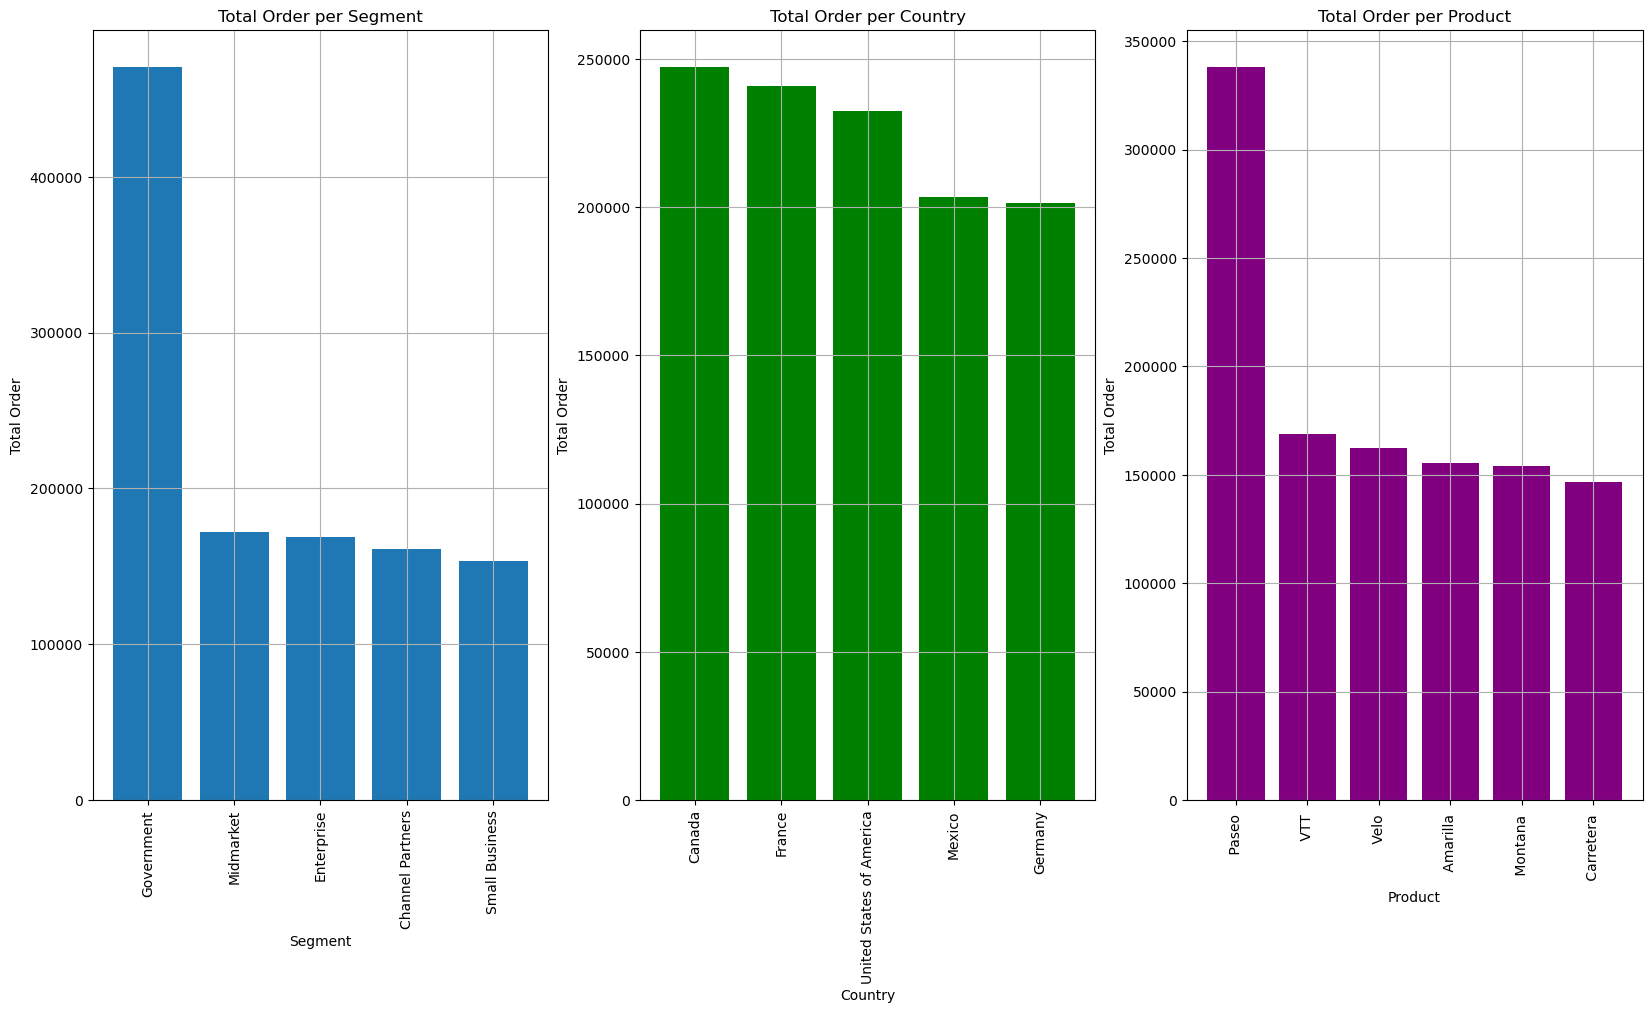

In [52]:
#Total order per Segment, Country and Product
order_seg = df.groupby('Segment').agg({'Units Sold':'sum'}).sort_values(by = 'Units Sold', ascending = False)
order_country = df.groupby('Country').agg({'Units Sold':'sum'}).sort_values(by = 'Units Sold', ascending = False)
order_pro = df.groupby('Product').agg({'Units Sold':'sum'}).sort_values(by = 'Units Sold', ascending = False)

fig, ax = plt.subplots(1,3, figsize = (20,10))

ax[0].bar(order_seg.index,order_seg['Units Sold'])
ax[0].set_xlabel('Segment')
ax[0].set_ylabel('Total Order')
ax[0].set_title('Total Order per Segment')
ax[0].grid()
ax[0].tick_params(axis='x', rotation=90)

ax[1].bar(order_country.index,order_country['Units Sold'], color = 'green')
ax[1].set_xlabel('Country')
ax[1].set_ylabel('Total Order')
ax[1].set_title('Total Order per Country')
ax[1].grid()
ax[1].tick_params(axis='x', rotation=90)

ax[2].bar(order_pro.index,order_pro['Units Sold'], color = 'purple')
ax[2].set_xlabel('Product')
ax[2].set_ylabel('Total Order')
ax[2].set_title('Total Order per Product')
ax[2].grid()
ax[2].tick_params(axis='x', rotation=90)


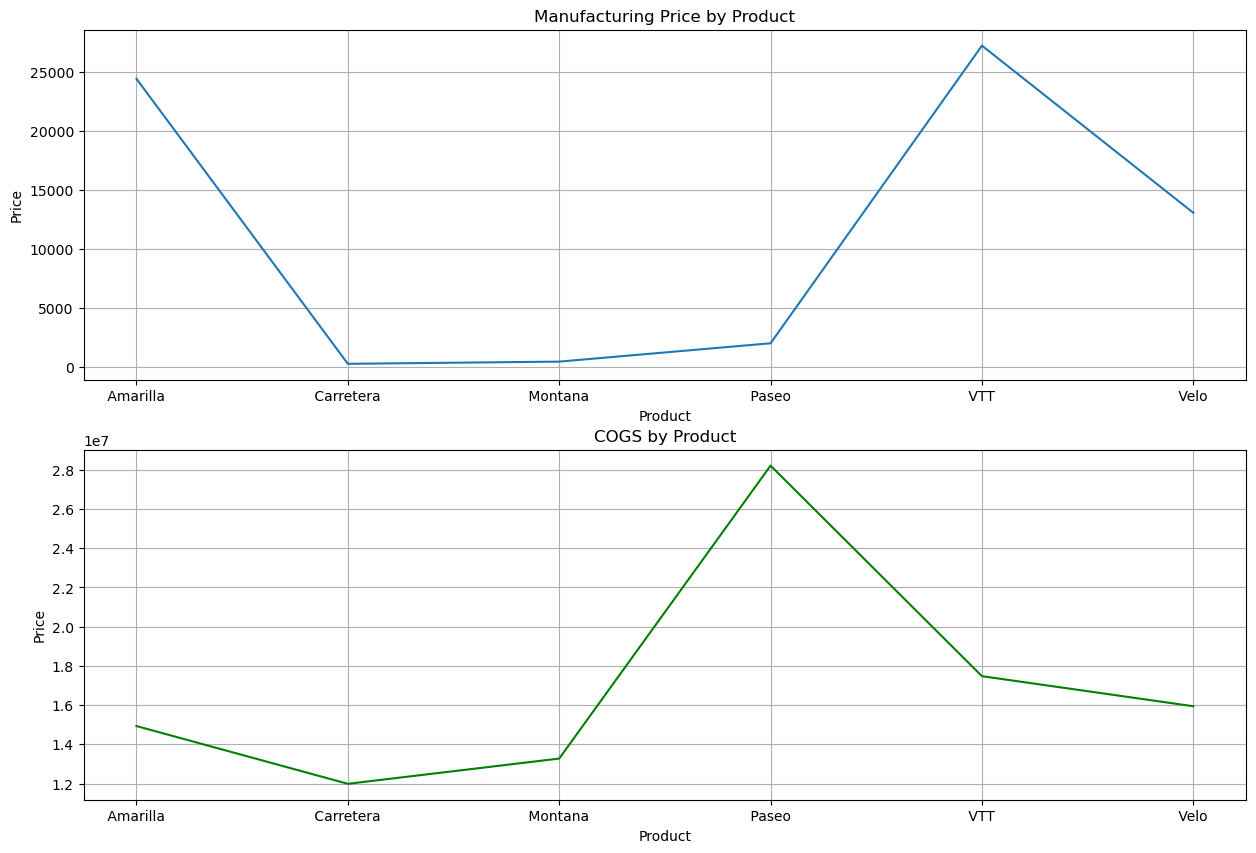

In [53]:
#Total Manufacturing Price and COGS per Product
cost_pro = df.groupby('Product').agg({'Manufacturing Price':'sum', 'COGS':'sum'})
fig, ax = plt.subplots(2,1, figsize = (15,10))

ax[0].plot(cost_pro.index,cost_pro['Manufacturing Price'])
ax[0].set_xlabel('Product')
ax[0].set_ylabel('Price')
ax[0].set_title('Manufacturing Price by Product')
ax[0].grid()

ax[1].plot(cost_pro.index,cost_pro['COGS'], color = 'green')
ax[1].set_xlabel('Product')
ax[1].set_ylabel('Price')
ax[1].set_title('COGS by Product')
ax[1].grid()

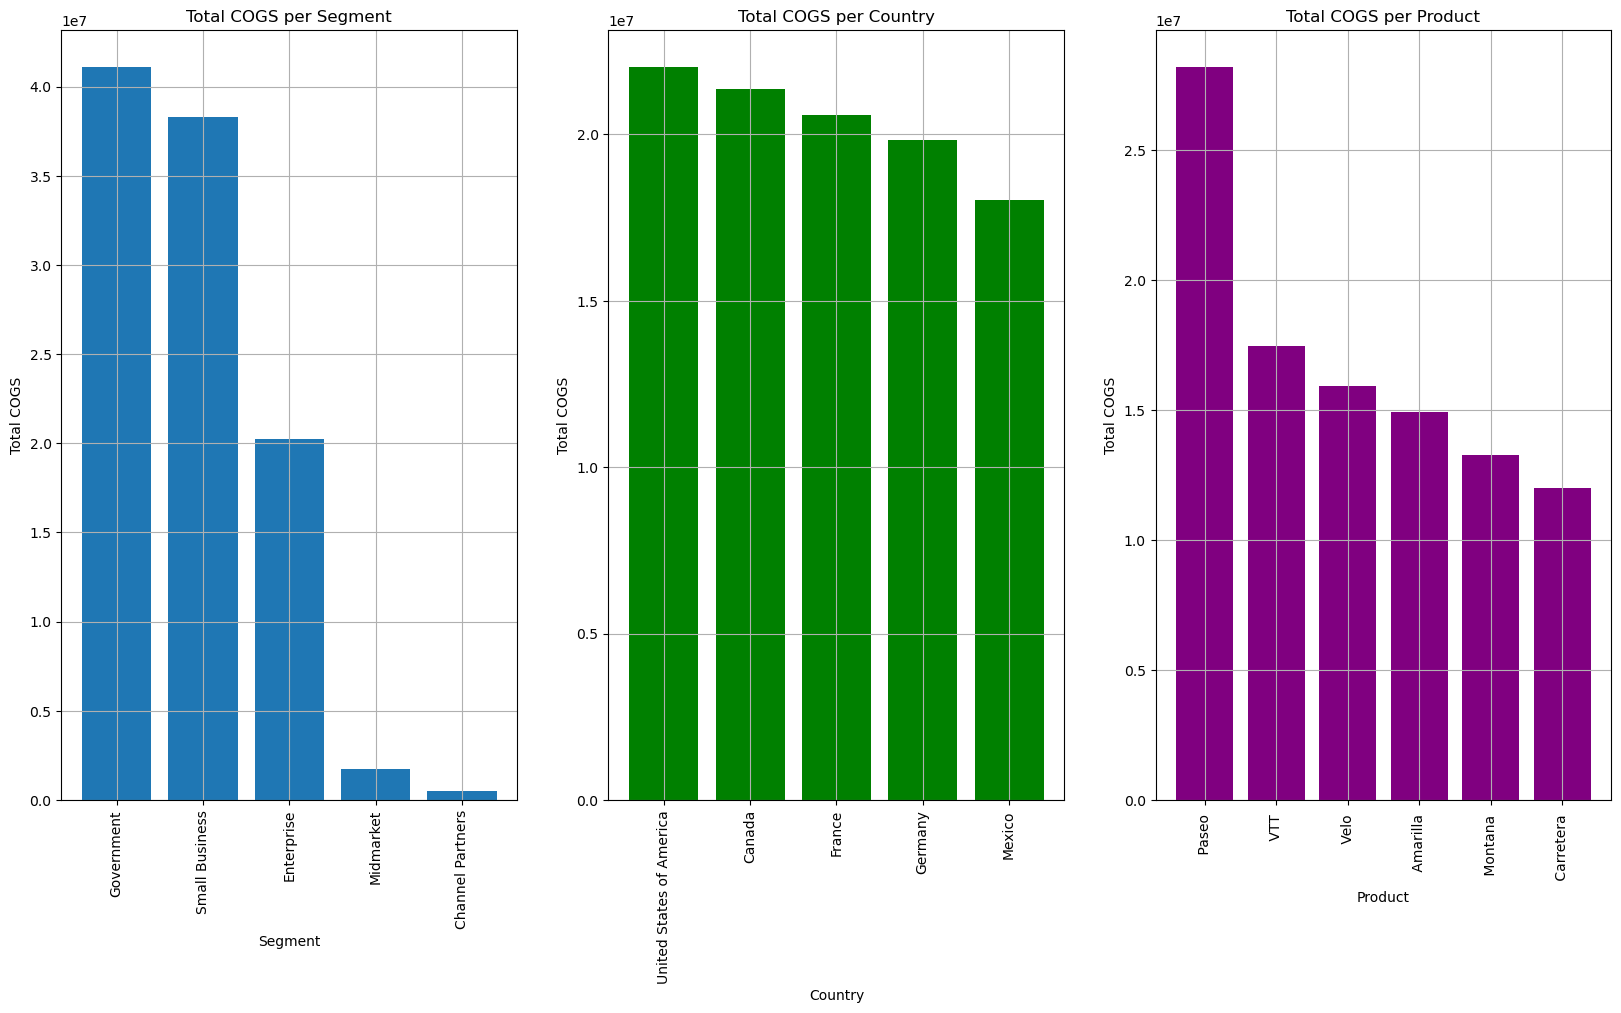

In [54]:
#Total COGS per Segment, Country and Product
cogs_seg = df.groupby('Segment').agg({'COGS':'sum'}).sort_values(by = 'COGS', ascending = False)
cogs_country = df.groupby('Country').agg({'COGS':'sum'}).sort_values(by = 'COGS', ascending = False)
cogs_pro = df.groupby('Product').agg({'COGS':'sum'}).sort_values(by = 'COGS', ascending = False)

fig, ax = plt.subplots(1,3, figsize = (20,10))

ax[0].bar(cogs_seg.index,cogs_seg['COGS'])
ax[0].set_xlabel('Segment')
ax[0].set_ylabel('Total COGS')
ax[0].set_title('Total COGS per Segment')
ax[0].grid()
ax[0].tick_params(axis='x', rotation=90)

ax[1].bar(cogs_country.index,cogs_country['COGS'], color = 'green')
ax[1].set_xlabel('Country')
ax[1].set_ylabel('Total COGS')
ax[1].set_title('Total COGS per Country')
ax[1].grid()
ax[1].tick_params(axis='x', rotation=90)

ax[2].bar(cogs_pro.index,cogs_pro['COGS'], color = 'purple')
ax[2].set_xlabel('Product')
ax[2].set_ylabel('Total COGS')
ax[2].set_title('Total COGS per Product')
ax[2].grid()
ax[2].tick_params(axis='x', rotation=90)

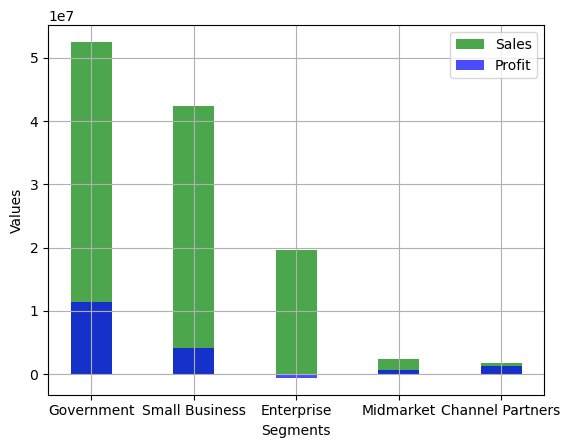

In [55]:
#Visualize Sales and Profit by Segments:
group_seg = df.groupby('Segment').agg({'Sales':'sum','Profit':'sum' }).sort_values(by = 'Sales', ascending = False)
plt.bar(group_seg.index,group_seg['Sales'], color = 'green',width = 0.4, alpha = 0.7, label = 'Sales')
plt.bar(group_seg.index,group_seg['Profit'], color = 'blue',width = 0.4, alpha = 0.7, label = 'Profit')
plt.xlabel('Segments')
plt.ylabel('Values')
plt.legend()
plt.grid()

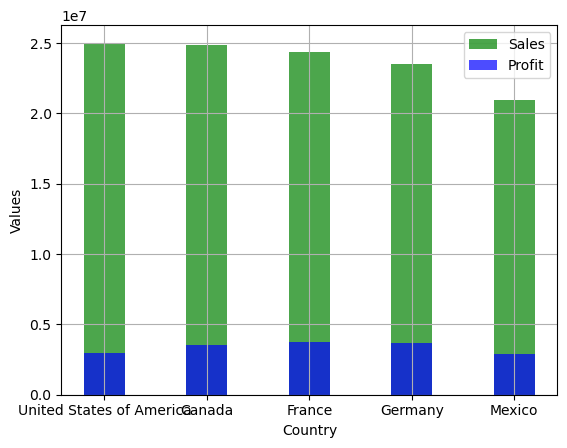

In [56]:
##Visualize Sales and Profit by Country:
group_country = df.groupby('Country').agg({'Sales':'sum','Profit':'sum' }).sort_values(by = 'Sales', ascending = False)
plt.bar(group_country.index,group_country['Sales'], color = 'green',width = 0.4, alpha = 0.7, label = 'Sales')
plt.bar(group_country.index,group_country['Profit'], color = 'blue',width = 0.4, alpha = 0.7, label = 'Profit')
plt.xlabel('Country')
plt.ylabel('Values')
plt.legend()
plt.grid()

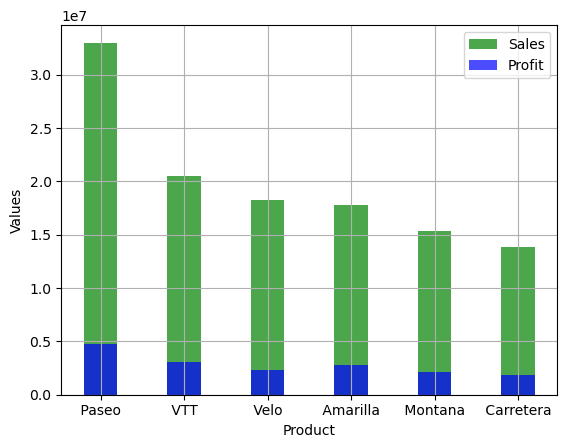

In [57]:
##Visualize Sales and Profit by Product:
group_pro = df.groupby('Product').agg({'Sales':'sum','Profit':'sum' }).sort_values(by = 'Sales', ascending = False)
plt.bar(group_pro.index,group_pro['Sales'], color = 'green',width = 0.4, alpha = 0.7, label = 'Sales')
plt.bar(group_pro.index,group_pro['Profit'], color = 'blue',width = 0.4, alpha = 0.7, label = 'Profit')
plt.xlabel('Product')
plt.ylabel('Values')
plt.legend()
plt.grid()

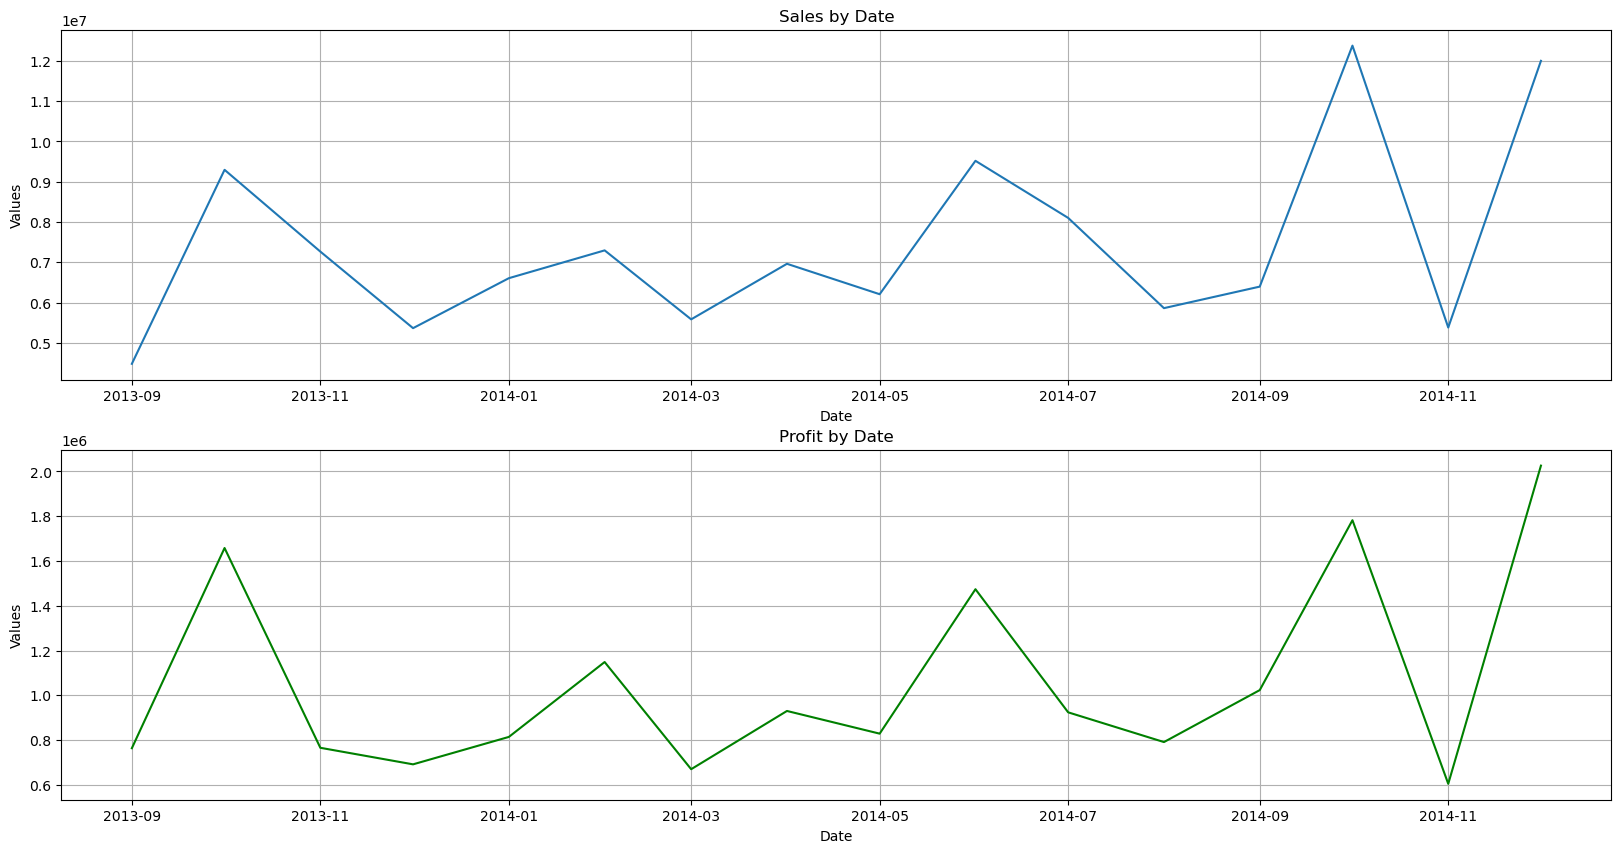

In [58]:
##Visualize Sales and Profit by time:
df_sale = df.groupby('Date').agg({'Sales':'sum', 'Profit':'sum'})
fig, ax = plt.subplots(2,1, figsize = (20,10))

ax[0].plot(df_sale.index,df_sale['Sales'])
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Values')
ax[0].set_title('Sales by Date')
ax[0].grid()

ax[1].plot(df_sale.index,df_sale['Profit'], color = 'green')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Values')
ax[1].set_title('Profit by Date')
ax[1].grid()

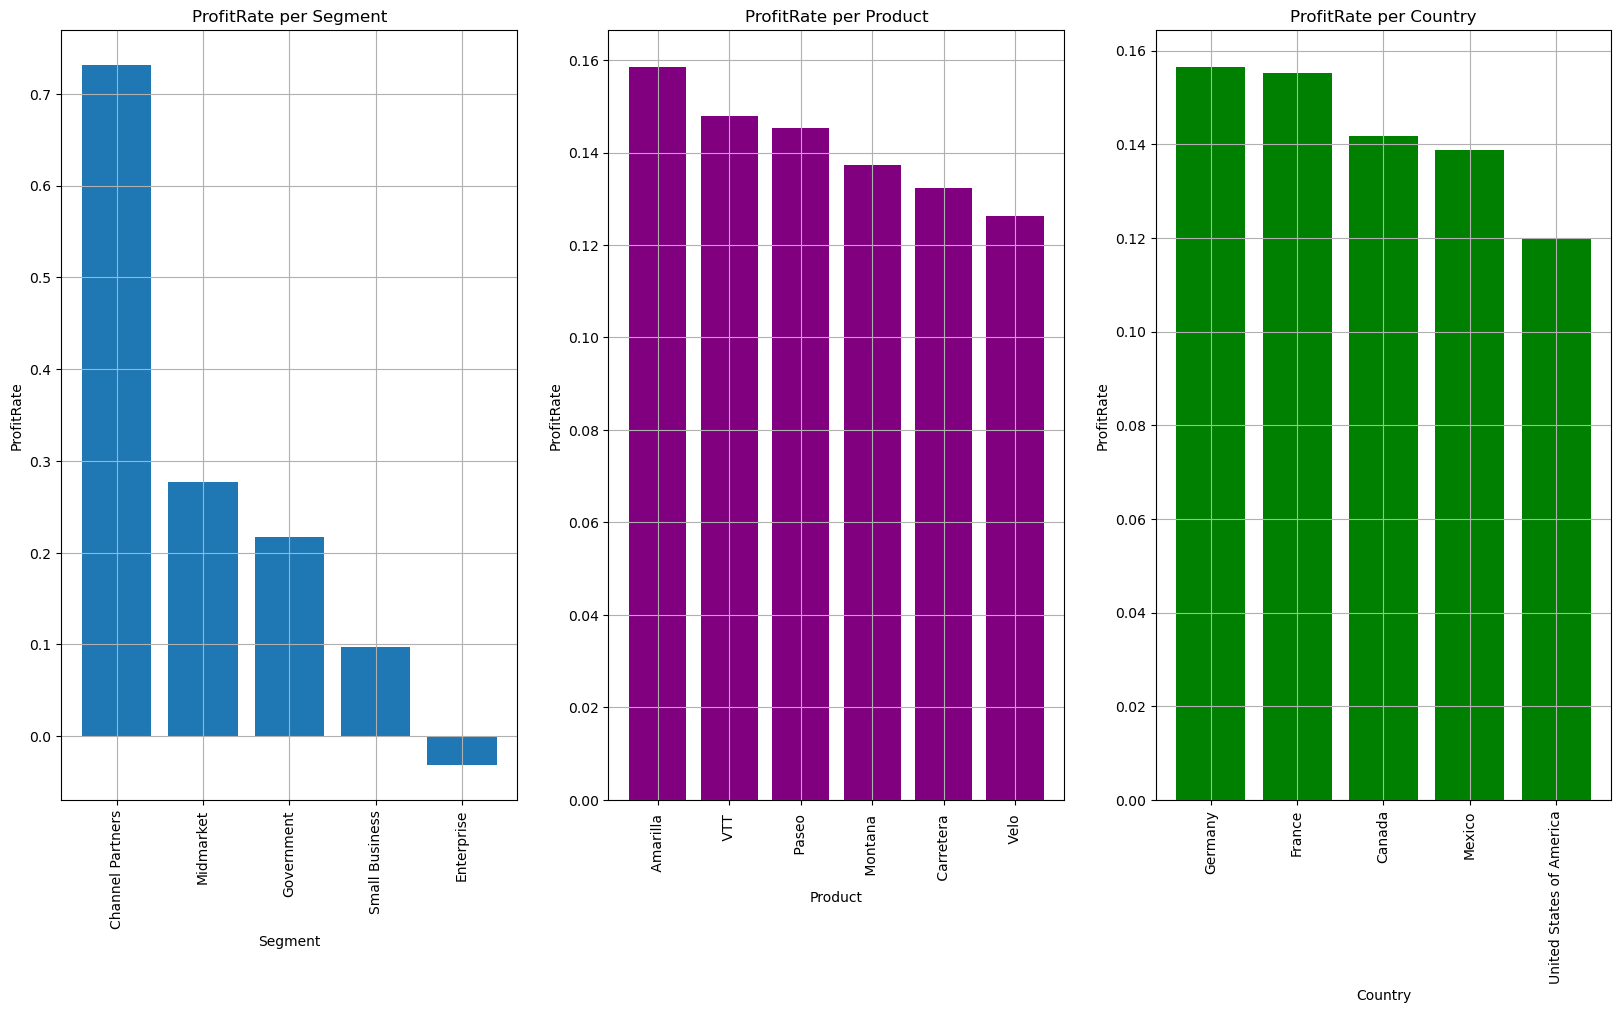

In [59]:
##Visualize Profit Rate by Segment, Product and Country:
profit_rate_seg = df.groupby('Segment').apply(lambda x: x['Profit'].sum() / x['Sales'].sum(), include_groups=False).reset_index(name='ProfitRate')
profit_rate_pro = df.groupby('Product').apply(lambda x: x['Profit'].sum() / x['Sales'].sum(), include_groups=False).reset_index(name='ProfitRate')
profit_rate_ct = df.groupby('Country').apply(lambda x: x['Profit'].sum() / x['Sales'].sum(), include_groups=False).reset_index(name='ProfitRate')

profit_rate_seg = profit_rate_seg.sort_values(by = 'ProfitRate', ascending = False)
profit_rate_pro = profit_rate_pro.sort_values(by = 'ProfitRate', ascending = False)
profit_rate_ct = profit_rate_ct.sort_values(by = 'ProfitRate', ascending = False)

fig, ax = plt.subplots(1,3, figsize = (20,10))

ax[0].bar(profit_rate_seg['Segment'],profit_rate_seg['ProfitRate'])
ax[0].set_xlabel('Segment')
ax[0].set_ylabel('ProfitRate')
ax[0].set_title('ProfitRate per Segment')
ax[0].grid()
ax[0].tick_params(axis='x', rotation=90)

ax[1].bar(profit_rate_pro['Product'],profit_rate_pro['ProfitRate'], color = 'purple')
ax[1].set_xlabel('Product')
ax[1].set_ylabel('ProfitRate')
ax[1].set_title('ProfitRate per Product')
ax[1].grid()
ax[1].tick_params(axis='x', rotation=90)

ax[2].bar(profit_rate_ct['Country'],profit_rate_ct['ProfitRate'], color = 'green')
ax[2].set_xlabel('Country')
ax[2].set_ylabel('ProfitRate')
ax[2].set_title('ProfitRate per Country')
ax[2].grid()
ax[2].tick_params(axis='x', rotation=90)


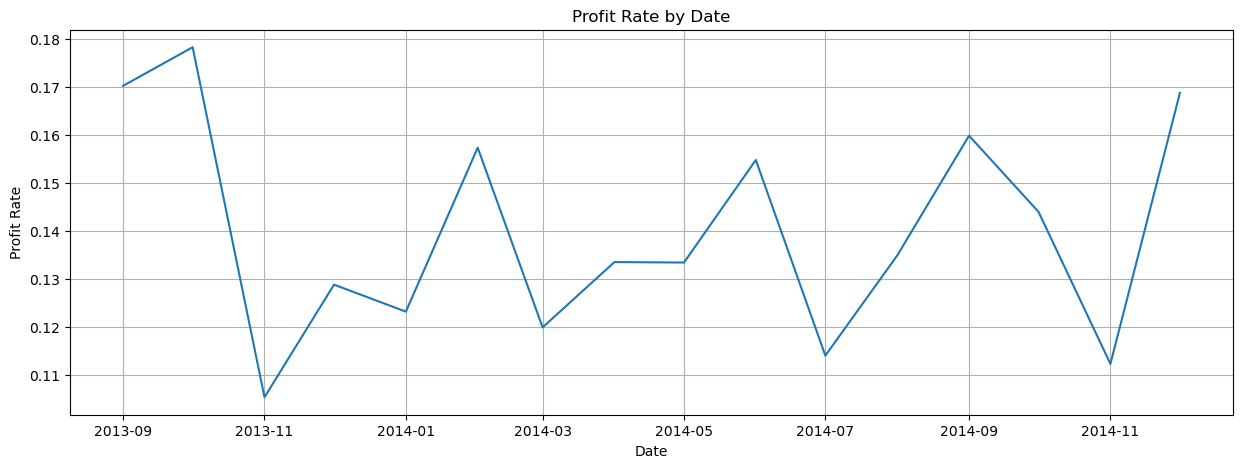

In [60]:
##Visualize Profit Rate by Date:
profit_rate_date = df.groupby('Date').apply(lambda x: x['Profit'].sum() / x['Sales'].sum(), include_groups=False).reset_index(name='ProfitRate')

plt.figure(figsize = (15,5))
plt.plot(profit_rate_date['Date'], profit_rate_date['ProfitRate'])
plt.title('Profit Rate by Date')
plt.xlabel('Date')
plt.ylabel('Profit Rate')
plt.grid()


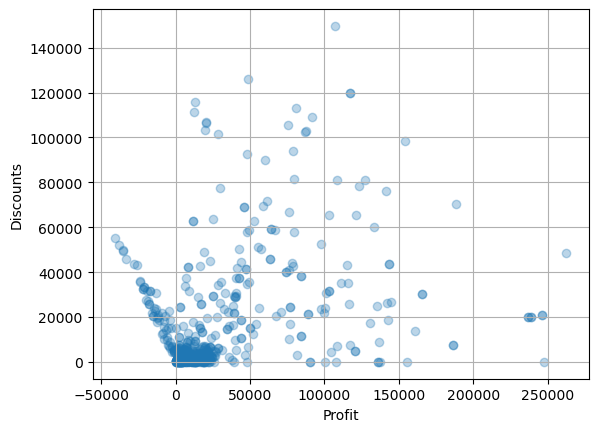

In [61]:
# Create a scatter plot of 'Discounts' vs 'Profit'
plt.scatter(df['Profit'],df['Discounts'], alpha = 0.3)
plt.xlabel('Profit')
plt.ylabel('Discounts')
plt.grid()

<Axes: >

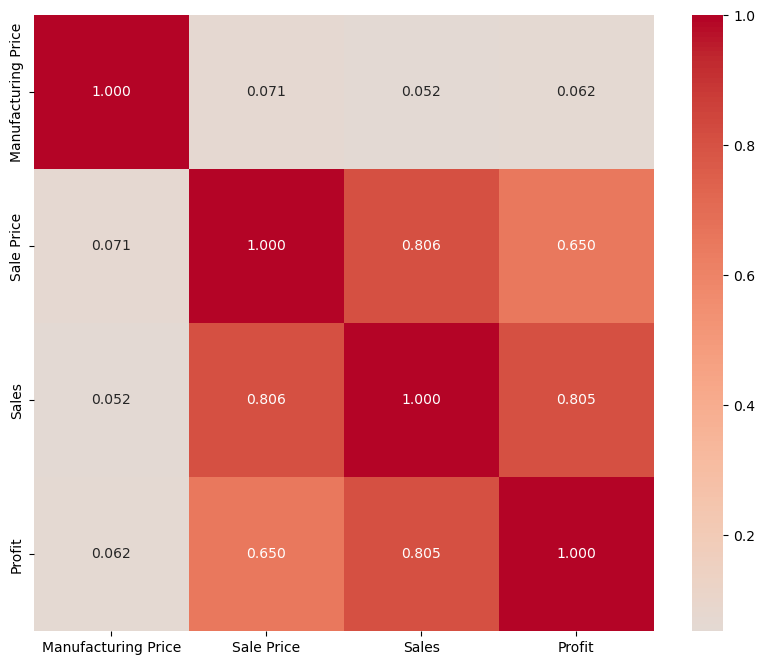

In [62]:
# Plot heatmap of correlation
correlation = df[['Manufacturing Price','Sale Price','Sales','Profit']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True,fmt = '.3f', cmap='coolwarm', center=0)